In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import imageio.v3 as imageio
from tqdm.auto import trange
import texture_segmentation.gabor as gabor

plt.rcParams['image.cmap'] = 'gray'

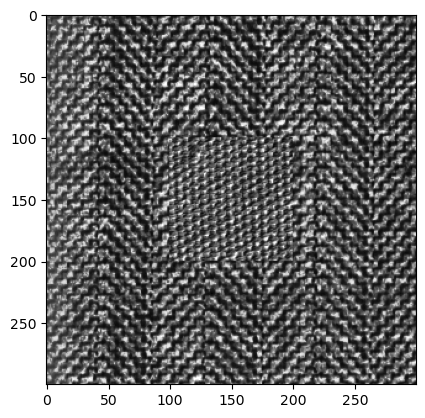

In [2]:
# @title Image
imsize = 300 # @param {type:"integer"}
backgroud_texture_id = 17 # @param {type:"integer"}
inner_texture_id = 77 # @param {type:"integer"}

bg_image_url = f"https://www.ux.uis.no/~tranden/brodatz/D{backgroud_texture_id}.gif"
texture_image_url = f"https://www.ux.uis.no/~tranden/brodatz/D{inner_texture_id}.gif"


bg_image = imageio.imread(bg_image_url)
bg_image = bg_image[:, 0:imsize, 0:imsize].astype(float) / 255

texture_image = imageio.imread(texture_image_url)
texture_image = texture_image[:, 0:imsize, 0:imsize].astype(float) / 255
mask = np.zeros_like(bg_image)
mask[:, imsize//3:-imsize//3, imsize//3:-imsize//3] = 1
mask = sp.ndimage.gaussian_filter(mask, sigma=(0, 0, 0))

texture_image = texture_image - texture_image.mean() + bg_image.mean()
texture_image = texture_image * bg_image.std() / texture_image.std()
texture_image = np.clip(texture_image, 0, 1)

image = (1 - mask) * bg_image + mask * texture_image
image -= image.min()
image /= image.max()
# image = np.random.normal(image, 0.1)
image = np.clip(image, 0, 1)
image = image[0]
plt.imshow(image)
plt.show()

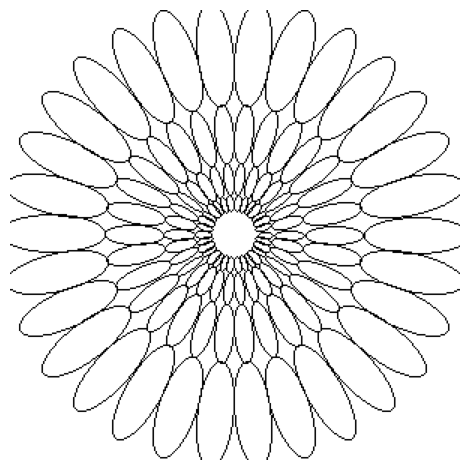

In [3]:
filter_bank_params = {
    'size': 300,
    'num_angles': 30,
    'full_circle': True,
    'scaling_factor': 0.3,
    'num_scales': 4,
    'sigma_x0': 0.2,
    "sigma_y0": 0.07
}

arr = gabor.plot_gabor_filter_bank_fft_fwhm(**filter_bank_params)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.imshow(arr, cmap="binary")
ax.set_axis_off()
plt.tight_layout()
plt.show()

(1, 1, 1, 300, 300) (1, 4, 30, 300, 300)
(1, 4, 30, 300, 300)


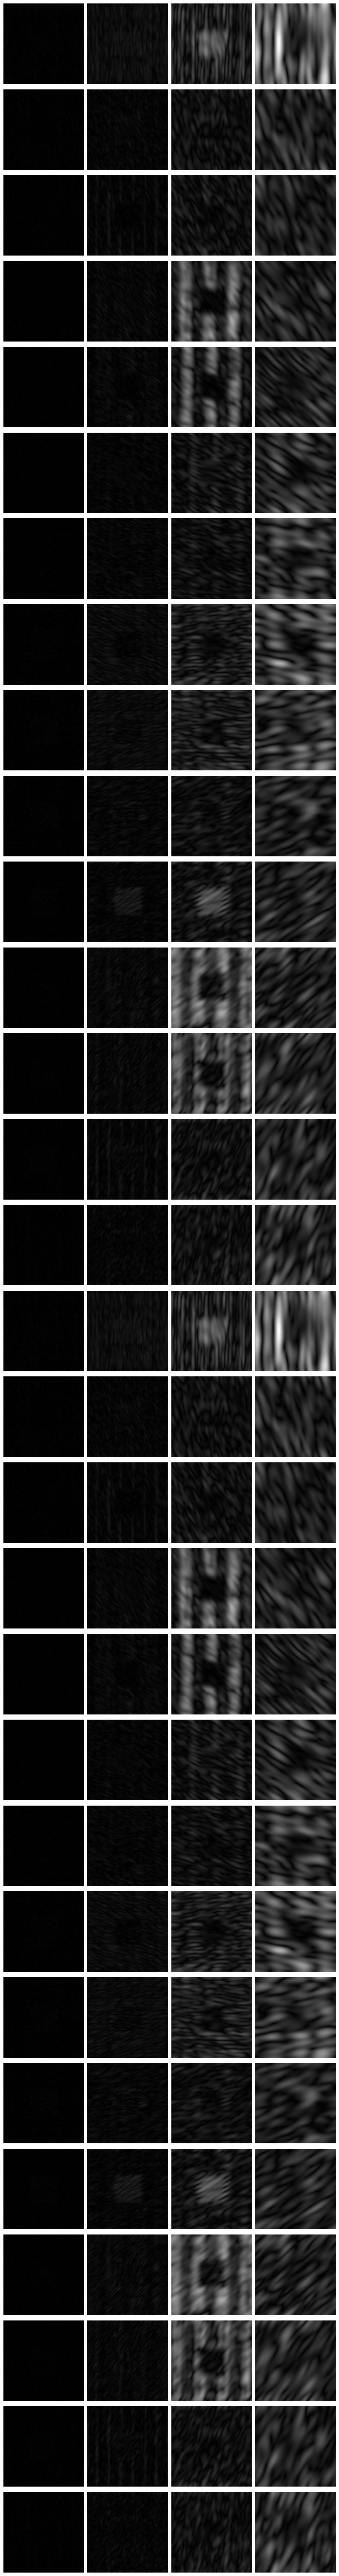

In [13]:

gabor_features_complex = gabor.gabor_features_raw(image, None)

# im = np.zeros((*gabor_features_complex.shape, 3), dtype=float)
# im[..., 0] = gabor_features_complex.real
# im[..., 2] = gabor_features_complex.imag

im = np.abs(gabor_features_complex)

im = im - im.min(keepdims=True)
im = im / im.max(keepdims=True)


# Plot the complex gabor features
s = 10
fig, axs = plt.subplots(nrows=im.shape[1], ncols=im.shape[0], figsize=(s, int(s * im.shape[1] / im.shape[0])))
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        axs[j, i].imshow(im[i, j], vmin=0, vmax=1)
        axs[j, i].axis("off")
plt.tight_layout()
plt.show()